#**Import Libraries**

In [ ]:
pip install twython

In [ ]:
pip install vaderSentiment

In [ ]:
pip install colorama

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore, init
import plotly.express as px

import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
from collections import Counter
from wordcloud import WordCloud


nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import string
import re
import nltk
import nltk.corpus
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#**Load Data**

In [ ]:
data = pd.read_csv("/content/sentimentdataset.csv")

In [ ]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [ ]:
data.tail()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20
731,732,736,Organizing a virtual talent show during challe...,Happy,2020-11-15 15:15:00,VirtualTalentShowSuccessHighSchool,Instagram,#VirtualEntertainment #HighSchoolPositivity,24.0,47.0,USA,2020,11,15,15


In [ ]:
def null_count():
    return pd.DataFrame({'features': data.columns,
                'dtypes': data.dtypes.values,
                'NaN count': data.isnull().sum().values,
                'NaN percentage': data.isnull().sum().values/data.shape[0]}).style.background_gradient(cmap='Set3',low=0.1,high=0.01)
null_count()

,features,dtypes,NaN count,NaN percentage
0,Unnamed: 0.1,int64,0,0.000000
1,Unnamed: 0,int64,0,0.000000
2,Text,object,0,0.000000
3,Sentiment,object,0,0.000000
4,Timestamp,object,0,0.000000
5,User,object,0,0.000000
6,Platform,object,0,0.000000
7,Hashtags,object,0,0.000000
8,Retweets,float64,0,0.000000
9,Likes,float64,0,0.000000


#**Exploratory Data Analysis(EDA)**

In [ ]:
num_rows, num_cols = data.shape
total_data_points = num_rows * num_cols
print(f"Total data points: {total_data_points}")

Total data points: 10980


In [ ]:
print(f"Number of columns: {num_cols}")

Number of columns: 15


In [ ]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [ ]:
for column in data.columns:
    num_distinct_values = len(data[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Unnamed: 0.1: 732 distinct values
Unnamed: 0: 732 distinct values
Text: 707 distinct values
Sentiment: 279 distinct values
Timestamp: 683 distinct values
User: 685 distinct values
Platform: 4 distinct values
Hashtags: 697 distinct values
Retweets: 26 distinct values
Likes: 38 distinct values
Country: 115 distinct values
Year: 14 distinct values
Month: 12 distinct values
Day: 31 distinct values
Hour: 22 distinct values


In [ ]:
data.columns.to_list()

['Unnamed: 0.1',
 'Unnamed: 0',
 'Text',
 'Sentiment',
 'Timestamp',
 'User',
 'Platform',
 'Hashtags',
 'Retweets',
 'Likes',
 'Country',
 'Year',
 'Month',
 'Day',
 'Hour']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [ ]:
data.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [ ]:
duplicates = data.duplicated().sum()
print("Number of Duplicate Rows:", duplicates)

Number of Duplicate Rows: 0


In [ ]:
data = data.drop_duplicates()

In [ ]:
duplicates = data.duplicated().sum()
print("Number of Duplicate columns:", duplicates)

Number of Duplicate columns: 0


In [ ]:
data = data.drop_duplicates()

In [ ]:
data.isna()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
729,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
730,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isna().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Text,0
Sentiment,0
Timestamp,0
User,0
Platform,0
Hashtags,0
Retweets,0
Likes,0


In [ ]:
num_data = data.select_dtypes(include=['number'])
cat_data = data.select_dtypes(include=['object'])

In [ ]:
print("Numerical Data:")
print(num_data.head())
print("\nCategorical Data:")
print(cat_data.head())

Numerical Data:
   Unnamed: 0.1  Unnamed: 0  Retweets  Likes  Year  Month  Day  Hour
0             0           0      15.0   30.0  2023      1   15    12
1             1           1       5.0   10.0  2023      1   15     8
2             2           2      20.0   40.0  2023      1   15    15
3             3           3       8.0   15.0  2023      1   15    18
4             4           4      12.0   25.0  2023      1   15    19

Categorical Data:
                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   C

In [ ]:
def remove_outliers(data, column_name):
    q1 = data[column_name].quantile(0.25)
    q3 = data[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data[column_name] = data[column_name].clip(upper_bound, lower_bound)
    data[column_name] = data[column_name].clip(lower_bound, upper_bound)
    return data

In [ ]:
for col in num_data.columns:
    num_data = remove_outliers(num_data, col)

In [ ]:
data["Text"]

,Text
0,Enjoying a beautiful day at the park! ...
1,Traffic was terrible this morning. ...
2,Just finished an amazing workout! 💪 ...
3,Excited about the upcoming weekend getaway! ...
4,Trying out a new recipe for dinner tonight. ...
...,...
727,Collaborating on a science project that receiv...
728,Attending a surprise birthday party organized ...
729,Successfully fundraising for a school charity ...
730,"Participating in a multicultural festival, cel..."


In [ ]:
data[["Text", "Sentiment"]]

,Text,Sentiment
0,Enjoying a beautiful day at the park! ...,Positive
1,Traffic was terrible this morning. ...,Negative
2,Just finished an amazing workout! 💪 ...,Positive
3,Excited about the upcoming weekend getaway! ...,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral
...,...,...
727,Collaborating on a science project that receiv...,Happy
728,Attending a surprise birthday party organized ...,Happy
729,Successfully fundraising for a school charity ...,Happy
730,"Participating in a multicultural festival, cel...",Happy


In [ ]:
data["Text"].max()

"Wrapped in the cloak of emotional numbness, a shield against the storms of life's turbulence. "

In [ ]:
data["Sentiment"].max()

' Zest '

In [ ]:
data["Text"].min()

' A bitter experience turned into a valuable lesson.      '

In [ ]:
data["Sentiment"].min()

' Acceptance   '

In [ ]:
data.shape

(732, 15)

In [ ]:
data.values

array([[0, 0, ' Enjoying a beautiful day at the park!              ',
        ..., 1, 15, 12],
       [1, 1, ' Traffic was terrible this morning.                 ',
        ..., 1, 15, 8],
       [2, 2, ' Just finished an amazing workout! 💪               ', ...,
        1, 15, 15],
       ...,
       [730, 734,
        'Successfully fundraising for a school charity initiative. The joy of giving back to the community! ',
        ..., 4, 5, 17],
       [731, 735,
        'Participating in a multicultural festival, celebrating diversity with music, dance, and delicious food! ',
        ..., 2, 29, 20],
       [732, 736,
        "Organizing a virtual talent show during challenging times, bringing smiles to classmates' faces! ",
        ..., 11, 15, 15]], dtype=object)

In [ ]:
data['Platform'].value_counts()

,count
Platform,
Instagram,258
Facebook,231
Twitter,128
Twitter,115


In [ ]:
data['Platform'].value_counts()

,count
Platform,
Instagram,258
Facebook,231
Twitter,128
Twitter,115


In [ ]:
data['Platform'] = data['Platform'].str.strip()

In [ ]:
data['Country'].value_counts()

,count
Country,
USA,59
USA,55
UK,49
Canada,44
Australia,41
...,...
Netherlands,1
USA,1
Germany,1


In [ ]:
data['Country'] = data['Country'].str.strip()

In [ ]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

data['Day_of_Week'] = data['Timestamp'].dt.day_name()

In [ ]:
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

data['Month'] = data['Month'].map(month_mapping)

data['Month'] = data['Month'].astype('object')

In [ ]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('.*?.*?', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    text = " ".join(text.split())
    token = word_tokenize(text)
    cleaned_text = [stemmer.stem(word) for word in token if word not in stop_words]
    cleaned_text = ' '.join(cleaned_text)
    return cleaned_text

data["Clean_Text"] = data["Text"].apply(clean)

data1 = data.copy()

In [ ]:
specified_columns = ['Platform','Country', 'Year','Month','Day_of_Week']

for col in specified_columns:
    total_unique_values = data[col].nunique()
    print(f'Total unique values for {col}: {total_unique_values}')

    top_values = data[col].value_counts()

    colors = [Fore.RED, Fore.GREEN, Fore.YELLOW, Fore.BLUE, Fore.MAGENTA, Fore.CYAN, Fore.WHITE, Fore.LIGHTBLACK_EX, Fore.LIGHTRED_EX, Fore.LIGHTGREEN_EX]

    for i, (value, count) in enumerate(top_values.items()):
        color = colors[i % len(colors)]
        print(f'{color}{value}: {count}{Fore.RESET}')

    print('\n' + '=' * 30 + '\n')

Total unique values for Platform: 3
Instagram: 258
Twitter: 243
Facebook: 231


Total unique values for Country: 33
USA: 188
UK: 143
Canada: 135
Australia: 75
India: 70
Brazil: 17
France: 16
Japan: 15
Germany: 14
Italy: 11
Spain: 6
South Africa: 6
Greece: 5
Netherlands: 4
Switzerland: 3
Portugal: 2
Austria: 2
Belgium: 2
Denmark: 2
Czech Republic: 2
Sweden: 2
Colombia: 1
Scotland: 1
Kenya: 1
Jamaica: 1
Ireland: 1
China: 1
Norway: 1
Cambodia: 1
Maldives: 1
Peru: 1
Jordan: 1
Thailand: 1


Total unique values for Year: 14
2023: 289
2019: 73
2020: 69
2021: 63
2022: 63
2018: 56
2017: 43
2016: 38
2015: 19
2011: 4
2012: 4
2013: 4
2014: 4
2010: 3


Total unique values for Month: 12
February: 85
January: 82
August: 78
September: 77
June: 71
July: 62
April: 51
November: 49
October: 48
May: 46
March: 44
December: 39


Total unique values for Day_of_Week: 7
Sunday: 119
Saturday: 115
Tuesday: 110
Friday: 108
Monday: 97
Thursday: 95
Wednesday: 88




In [ ]:
analyzer = SentimentIntensityAnalyzer()

data1['Vader_Score'] = data1['Clean_Text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

data1['Sentiment'] = data1['Vader_Score'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

print(data1[['Clean_Text', 'Vader_Score', 'Sentiment']].head())

  Clean_Text  Vader_Score Sentiment
0                     0.0   Neutral
1                     0.0   Neutral
2                     0.0   Neutral
3                     0.0   Neutral
4                     0.0   Neutral


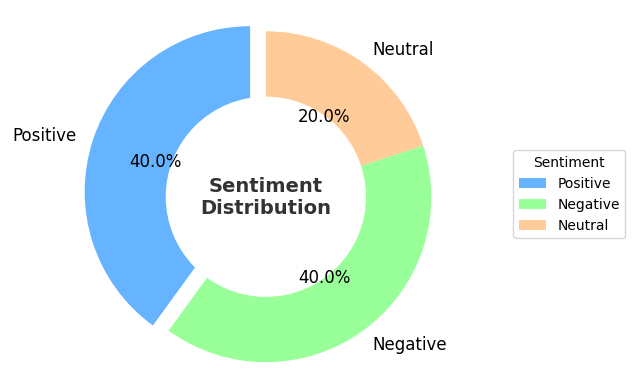

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {'Sentiment':['Positive','Negative','Neutral','Positive', 'Negative']}
data1 = pd.DataFrame(data)

colors = ['#66b3ff', '#99ff99', '#ffcc99']
explode = (0.1, 0, 0)

sentiment_counts = data1['Sentiment'].value_counts()

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(x=sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, textprops={'fontsize': 12})

labels=sentiment_counts.index,
autopct=lambda p:f'{p:.2f}%\n({int(p*sum(sentiment_counts)/100)})',
wedgeprops=dict(width=0.7),
textprops=dict(size=10, color="r"),
pctdistance=0.7,
colors=colors[:len(sentiment_counts)],
explode=explode[:len(sentiment_counts)],
shadow=True
center_circle = plt.Circle((0, 0),0.6, color='white', fc='white',linewidth=1.25)
fig.gca().add_artist(center_circle)

ax.text(0, 0, 'Sentiment\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold',color='#333333')
ax.legend(sentiment_counts.index, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.axis('equal')

plt.show()


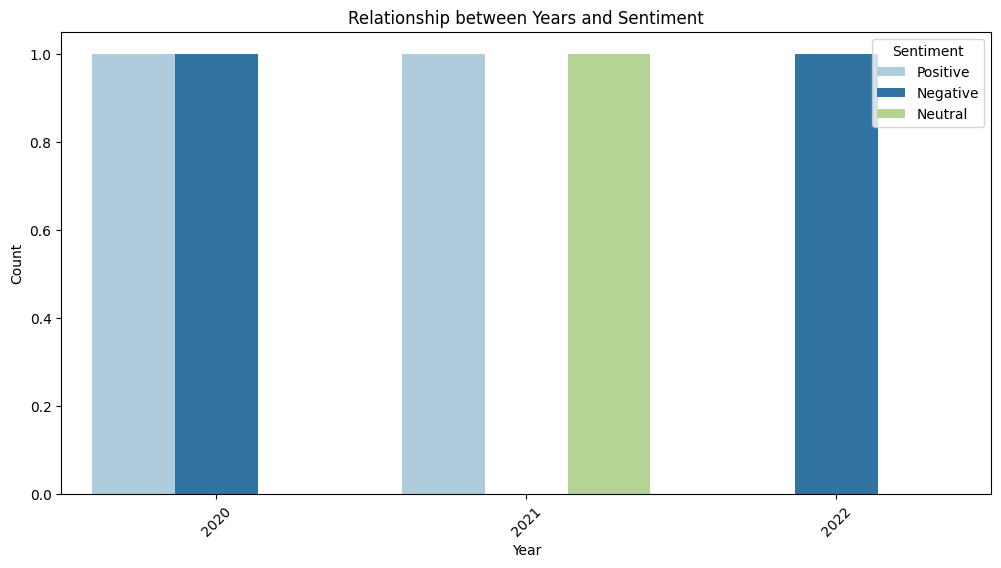

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = {
    'Year': [2020, 2020, 2021, 2021, 2022],
    'Sentiment': ['Positive', 'Negative', 'Neutral', 'Positive', 'Negative']
}
data1 = pd.DataFrame(data)

data1['Year'] = data1['Year'].astype(str)
data1['Sentiment'] = data1['Sentiment'].astype(str)

plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Sentiment', data=data1, palette='Paired')
plt.title('Relationship between Years and Sentiment')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

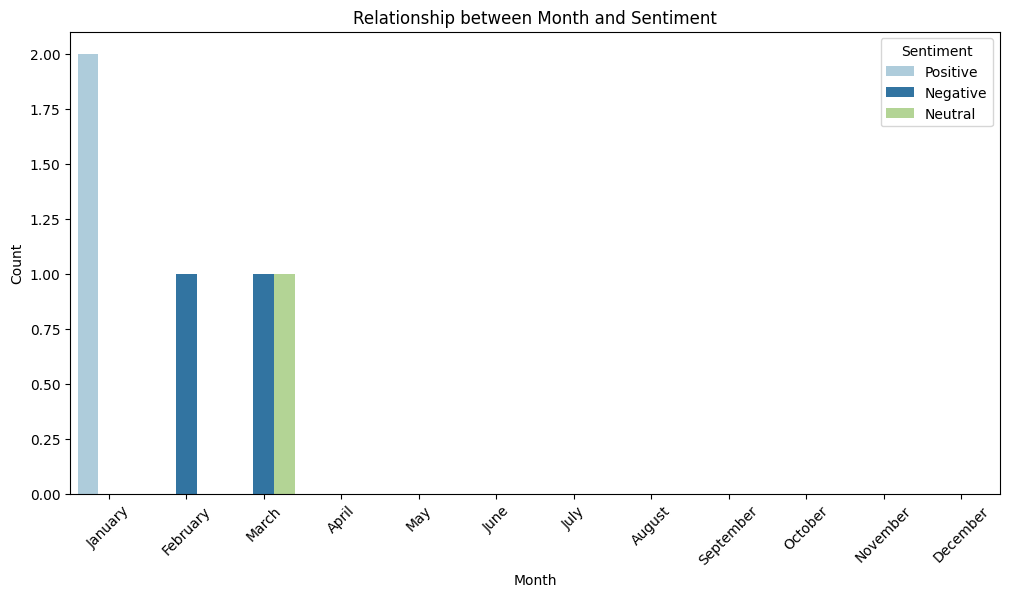

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Date': ['2023-01-15', '2023-02-20', '2023-03-05', '2023-01-10', '2023-03-25'],
    'Sentiment': ['Positive', 'Negative', 'Neutral', 'Positive', 'Negative']
}
data1 = pd.DataFrame(data)

data1['Month'] = pd.to_datetime(data1['Date']).dt.month
data1['Month'] = data1['Month'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Sentiment', data=data1, palette='Paired', order=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
plt.title('Relationship between Month and Sentiment')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

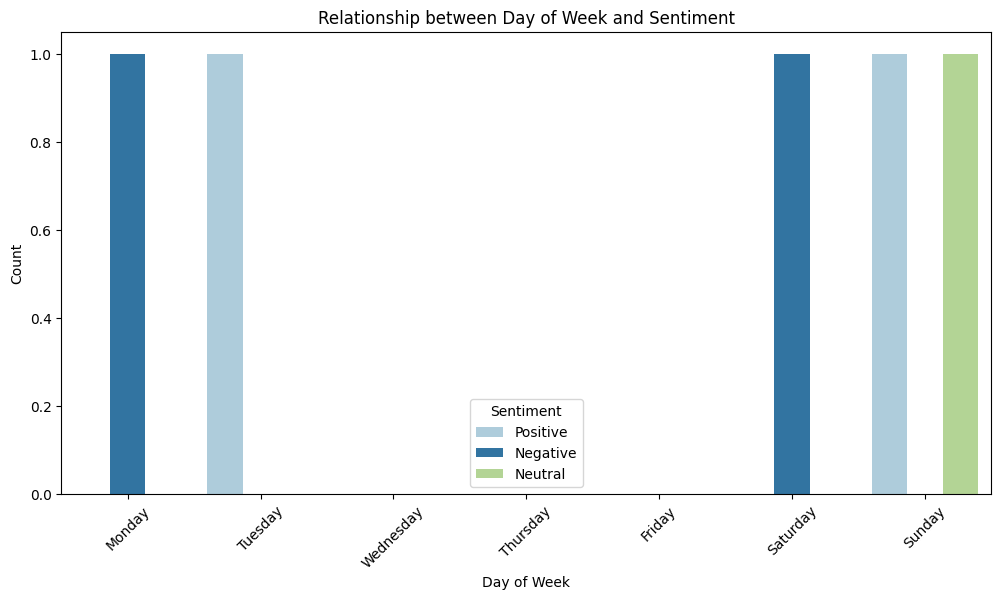

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Date': ['2023-01-15', '2023-02-20', '2023-03-05', '2023-01-10', '2023-03-25'],
    'Sentiment': ['Positive', 'Negative', 'Neutral', 'Positive', 'Negative']
}
data1 = pd.DataFrame(data)

data1['Day_of_Week'] = pd.to_datetime(data1['Date']).dt.day_name()

plt.figure(figsize=(12, 6))
sns.countplot(
    x='Day_of_Week',
    hue='Sentiment',
    data=data1,
    palette='Paired',
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']  # Ensure correct order
)
plt.title('Relationship between Day of Week and Sentiment')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

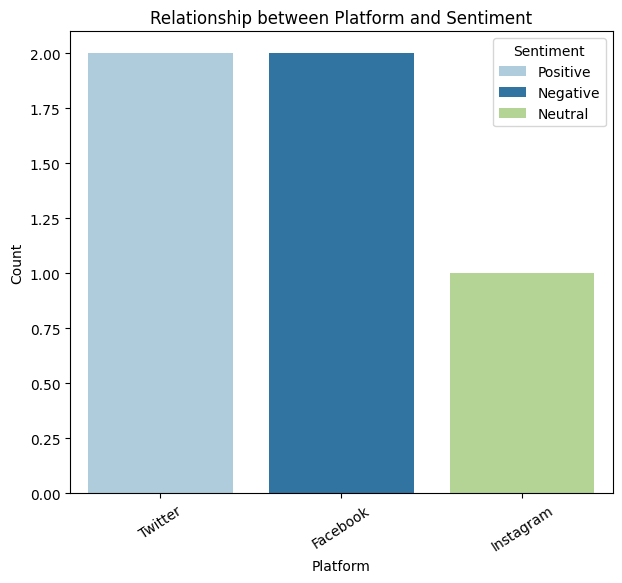

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Platform': ['Twitter', 'Facebook', 'Instagram', 'Twitter', 'Facebook'],
    'Sentiment': ['Positive', 'Negative', 'Neutral', 'Positive', 'Negative']
}
data1 = pd.DataFrame(data)

plt.figure(figsize=(7, 6))
sns.countplot(
    x='Platform',
    hue='Sentiment',
    data=data1,
    palette='Paired',
    order=data1['Platform'].unique()
)
plt.title('Relationship between Platform and Sentiment')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=33)
plt.show()

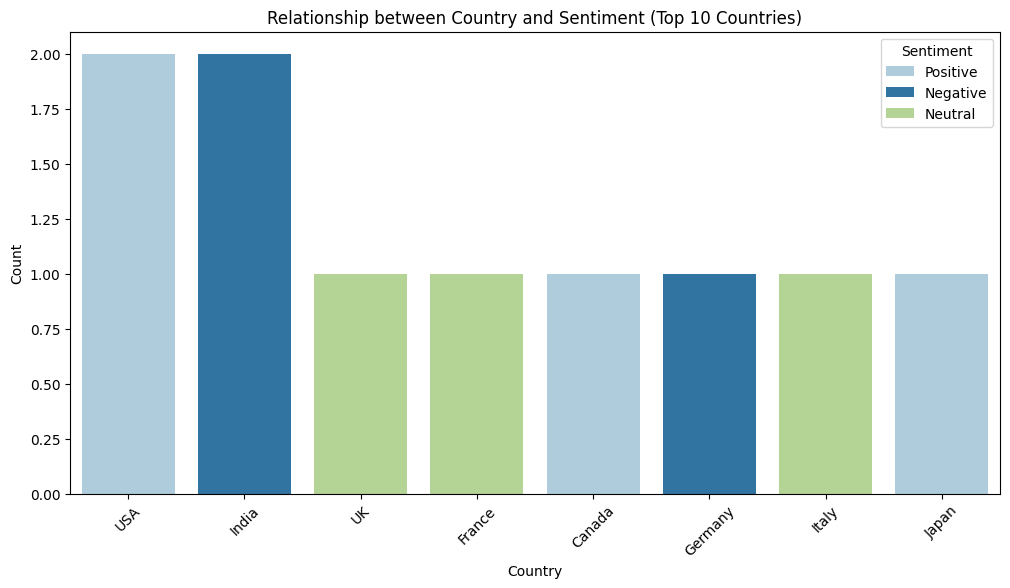

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Country': ['USA', 'India', 'UK', 'USA', 'India', 'France', 'Canada', 'Germany', 'Italy', 'Japan'],
    'Sentiment': ['Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Neutral', 'Positive']
}
data1 = pd.DataFrame(data)

top_10_countries = data1['Country'].value_counts().head(10).index

data_top_10_countries = data1[data1['Country'].isin(top_10_countries)]

plt.figure(figsize=(12, 6))
sns.countplot(
    x='Country',
    hue='Sentiment',
    data=data_top_10_countries,
    palette='Paired',
    order=top_10_countries
)
plt.title('Relationship between Country and Sentiment (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd
from collections import Counter


data = {
    'Clean_Text': [
        'This is a sample text for testing',
        'Testing word frequency with sample data',
        'Data analysis and text mining are fun',
        'Sample text data for word count testing'
    ]
}
data1 = pd.DataFrame(data)

data1['Clean_Text'] = data1['Clean_Text'].fillna('')

data1['temp_list'] = data1['Clean_Text'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in data1['temp_list'] for item in sublist])

top_words_data = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

display(top_words_data.style.background_gradient(cmap='Blues'))

print(top_words_data)

,Common_words,count
0,text,3
1,sample,2
2,for,2
3,testing,2
4,word,2
5,data,2
6,This,1
7,is,1
8,a,1
9,Testing,1


   Common_words  count
0          text      3
1        sample      2
2           for      2
3       testing      2
4          word      2
5          data      2
6          This      1
7            is      1
8             a      1
9       Testing      1
10    frequency      1
11         with      1
12         Data      1
13     analysis      1
14          and      1
15       mining      1
16          are      1
17          fun      1
18       Sample      1
19        count      1


In [195]:
data1['temp_list'] = data1['Clean_Text'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in data1['temp_list'] for item in sublist])
top_words_data = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

fig = px.bar(top_words_data,
            x="count",
            y="Common_words",
            title='Common Words in Text Data',
            orientation='h',
            width=700,
            height=700,
            color='Common_words')

fig.show()

In [ ]:
import pandas as pd

data = {
    'Text': ['I love this!', 'This is bad.', 'It is okay.', 'Absolutely fantastic!', 'Not good at all.'],
    'Sentiment': ['positive', 'negative', 'neutral', 'Positive', 'Negative']
}
data1 = pd.DataFrame(data)

data1['Sentiment'] = data1['Sentiment'].str.lower()

Positive_sent = data1[data1['Sentiment'] == 'positive']
Negative_sent = data1[data1['Sentiment'] == 'negative']
Neutral_sent = data1[data1['Sentiment'] == 'neutral']

print("Positive Sentiment:")
print(Positive_sent)

print("\nNegative Sentiment:")
print(Negative_sent)

print("\nNeutral Sentiment:")
print(Neutral_sent)

Positive Sentiment:
                    Text Sentiment
0           I love this!  positive
3  Absolutely fantastic!  positive

Negative Sentiment:
               Text Sentiment
1      This is bad.  negative
4  Not good at all.  negative

Neutral Sentiment:
          Text Sentiment
2  It is okay.   neutral


In [ ]:
import pandas as pd
from collections import Counter

data = {
    'Clean_Text': [
        'I love this product', 'Absolutely amazing experience',
        'Great service and support', 'Wonderful and fantastic!',
        'I would recommend this to everyone'
    ],
    'Sentiment': ['positive', 'positive', 'positive', 'positive', 'positive']
}
data1 = pd.DataFrame(data)

data1['Sentiment'] = data1['Sentiment'].str.lower()

data1['temp_list'] = data1['Clean_Text'].fillna('').apply(lambda x: str(x).split())

top = Counter([item for sublist in data1[data1['Sentiment'] == 'positive']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])

display(temp_positive.style.background_gradient(cmap='Greens'))

print(temp_positive)

,Common_words,count
0,I,2
1,this,2
2,and,2
3,love,1
4,product,1
5,Absolutely,1
6,amazing,1
7,experience,1
8,Great,1
9,service,1


  Common_words  count
0            I      2
1         this      2
2          and      2
3         love      1
4      product      1
5   Absolutely      1
6      amazing      1
7   experience      1
8        Great      1
9      service      1


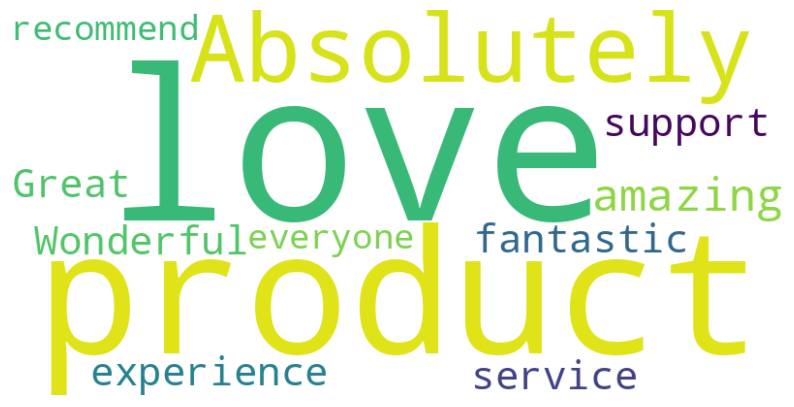

In [ ]:
words = ' '.join([item for sublist in data1[data1['Sentiment'] == 'positive']['temp_list'] for item in sublist])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
import pandas as pd
from collections import Counter

data = {
    'Clean_Text': [
        'I feel neutral about this', 'Not good, not bad', 'Just an average experience',
        'Nothing special', 'This is okay, neither good nor bad'
    ],
    'Sentiment': ['neutral', 'neutral', 'neutral', 'neutral', 'neutral']
}
data1 = pd.DataFrame(data)

data1['Sentiment'] = data1['Sentiment'].str.lower()

data1['temp_list'] = data1['Clean_Text'].fillna('').apply(lambda x: str(x).split())

top = Counter([item for sublist in data1[data1['Sentiment'] == 'neutral']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])

display(temp_positive.style.background_gradient(cmap='Blues'))

print(temp_positive)

,Common_words,count
0,bad,2
1,I,1
2,feel,1
3,neutral,1
4,about,1
5,this,1
6,Not,1
7,"good,",1
8,not,1
9,Just,1


  Common_words  count
0          bad      2
1            I      1
2         feel      1
3      neutral      1
4        about      1
5         this      1
6          Not      1
7        good,      1
8          not      1
9         Just      1


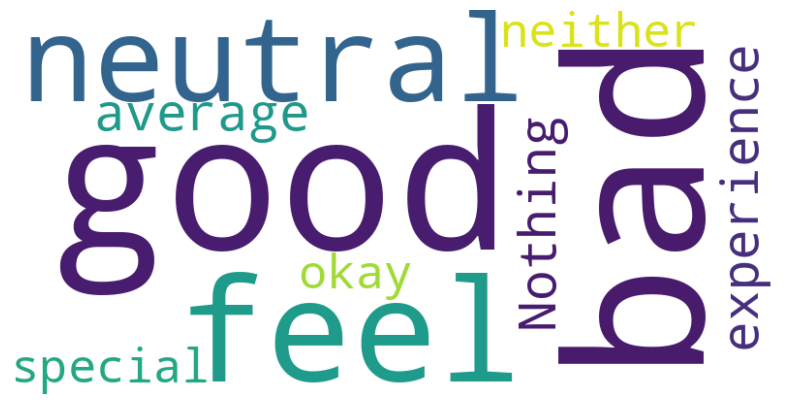

In [ ]:
words = ' '.join([item for sublist in data1[data1['Sentiment'] == 'neutral']['temp_list'] for item in sublist])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
import pandas as pd
from collections import Counter


data = {
    'Clean_Text': [
        'I hate this product', 'Worst experience ever', 'I would not recommend this',
        'It was a terrible decision', 'This is awful'
    ],
    'Sentiment': ['negative', 'negative', 'negative', 'negative', 'negative']
}
data1 = pd.DataFrame(data)

data1['Sentiment'] = data1['Sentiment'].str.lower()

data1['temp_list'] = data1['Clean_Text'].fillna('').apply(lambda x: str(x).split())

top = Counter([item for sublist in data1[data1['Sentiment'] == 'negative']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])

display(temp_positive.style.background_gradient(cmap='Reds'))

print(temp_positive)

,Common_words,count
0,I,2
1,this,2
2,hate,1
3,product,1
4,Worst,1
5,experience,1
6,ever,1
7,would,1
8,not,1
9,recommend,1


  Common_words  count
0            I      2
1         this      2
2         hate      1
3      product      1
4        Worst      1
5   experience      1
6         ever      1
7        would      1
8          not      1
9    recommend      1


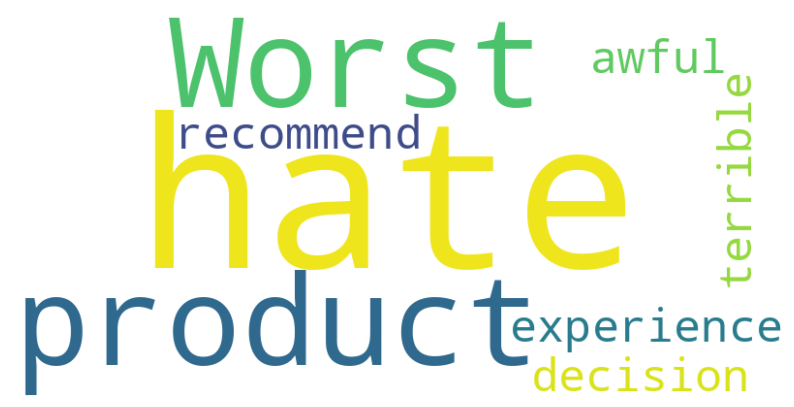

In [ ]:
words = ' '.join([item for sublist in data1[data1['Sentiment'] == 'negative']['temp_list'] for item in sublist])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#**Data Preparation**

In [ ]:
data2 = data1.copy()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

#**Split Data**

In [ ]:
data2 = data1.copy()
# Check if the 'Text' column exists in data2
if 'Text' not in data2.columns:
    # If 'Text' column is not present, try using 'Clean_Text' or other relevant column instead
    data2["Clean_Text"] = data2["Clean_Text"].apply(clean)  # Using 'Clean_Text' if available
else:
    data2["Clean_Text"] = data2["Text"].apply(clean)  # Using 'Text' if available

X = data2['Clean_Text'].values
y = data2['Sentiment'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**Modeling**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

X = ['I love machine learning', 'Python is great', 'Text classification is fun', 'I enjoy learning new things']
y = [1, 0, 1, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = vectorizer.fit_transform(X_train)

X_test_tfidf = vectorizer.transform(X_test)

clf = MultinomialNB()

clf.fit(X_train_tfidf, y_train)

y_pred = clf.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 0.00%


#**Passive Aggressive Classifier**

In [ ]:
pac_classifier = PassiveAggressiveClassifier(max_iter=50, random_state=42)
pac_classifier.fit(X_train_tfidf, y_train)

PassiveAggressiveClassifier(max_iter=50, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = ['I love machine learning', 'Python is great', 'Text classification is fun', 'I enjoy learning new things']
y = [1, 0, 1, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = vectorizer.fit_transform(X_train)

X_test_tfidf = vectorizer.transform(X_test)

random_forest_classifier = RandomForestClassifier()

random_forest_classifier.fit(X_train_tfidf, y_train)

y_pred_rf = random_forest_classifier.predict(X_test_tfidf)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

classification_rep_rf = classification_report(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf * 100:.2f}%")
print(f"Classification Report:\n{classification_rep_rf}")

Accuracy: 0.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



In [ ]:
print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_rf}")
print("Classification Report:\n", classification_rep_rf)


Random Forest Results:
Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



#**SVM Clssifier**

In [ ]:
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

SVC(random_state=42)

In [ ]:
y_pred_svm = svm_classifier.predict(X_test_tfidf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

In [ ]:
print("Support Vector Machine Results:")
print(f"Accuracy: {accuracy_svm}")
print("Classification Report:\n", classification_rep_svm)


Support Vector Machine Results:
Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



#**Multinomial NB**

In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
y_pred_nb = nb_classifier.predict(X_test_tfidf)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

In [ ]:
print("\nMultinomial Naive Bayes Results:")
print(f"Accuracy: {accuracy_nb}")
print("Classification Report:\n", classification_rep_nb)


Multinomial Naive Bayes Results:
Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



#**Best Modeling:Passive Aggressive Classifier**

In [ ]:
param_dist = {
    'C': [0.1, 0.5, 1.0],
    'fit_intercept': [True, False],
    'shuffle': [True, False],
    'verbose': [0, 1],
}

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import PassiveAggressiveClassifier

data = fetch_20newsgroups(subset='train', categories=['alt.atheism', 'sci.space'], remove=('headers', 'footers', 'quotes'))
X, y = data.data, data.target

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.75)
X_tfidf = vectorizer.fit_transform(X)

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

pac_classifier = PassiveAggressiveClassifier(random_state=42)

param_dist = {
    'C': [0.1, 0.5, 1.0],
    'fit_intercept': [True, False],
    'shuffle': [True, False],
    'verbose': [0, 1],
}

randomized_search = RandomizedSearchCV(
    pac_classifier,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42
)

randomized_search.fit(X_train_tfidf, y_train)

print("Best Parameters:", randomized_search.best_params_)

print("Best CV Score:", randomized_search.best_score_)

-- Epoch 1
Norm: 16.03, NNZs: 11152, Bias: 0.129192, T: 666, Avg. loss: 0.591133
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 18.88, NNZs: 11152, Bias: 0.099357, T: 1332, Avg. loss: 0.134678
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 19.46, NNZs: 11152, Bias: 0.100661, T: 1998, Avg. loss: 0.048059
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 19.58, NNZs: 11152, Bias: 0.102676, T: 2664, Avg. loss: 0.032988
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 19.61, NNZs: 11152, Bias: 0.103780, T: 3330, Avg. loss: 0.030024
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 19.62, NNZs: 11152, Bias: 0.103902, T: 3996, Avg. loss: 0.029280
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 19.62, NNZs: 11152, Bias: 0.103816, T: 4662, Avg. loss: 0.029175
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 19.62, NNZs: 11152, Bias: 0.103817, T: 5328, Avg. loss: 0.029156
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 19.62, NNZs: 11152, Bias: 0.103818, T: 5994, Avg

In [ ]:
best_params_randomized = randomized_search.best_params_

best_pac_classifier_randomized = PassiveAggressiveClassifier(random_state=42, **best_params_randomized)

best_pac_classifier_randomized.fit(X_train_tfidf, y_train)

y_pred_rf = best_pac_classifier_randomized.predict(X_test_tfidf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf}")
print(f"Classification Report: \n{classification_rep_rf}")

Accuracy: 0.9348837209302325
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        86
           1       0.94      0.95      0.95       129

    accuracy                           0.93       215
   macro avg       0.93      0.93      0.93       215
weighted avg       0.93      0.93      0.93       215



In [ ]:
y_pred_best_pac_randomized = best_pac_classifier_randomized.predict(X_test_tfidf)

accuracy_best_pac_randomized = accuracy_score(y_test, y_pred_best_pac_randomized)
classification_report_best_pac_randomized = classification_report(y_test, y_pred_best_pac_randomized)

print(f"Accuracy: {accuracy_best_pac_randomized}")
print(f"Classification Report: \n{classification_report_best_pac_randomized}")

Accuracy: 0.9348837209302325
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        86
           1       0.94      0.95      0.95       129

    accuracy                           0.93       215
   macro avg       0.93      0.93      0.93       215
weighted avg       0.93      0.93      0.93       215



In [ ]:
accuracy_best_pac_randomized = accuracy_score(y_test, y_pred_best_pac_randomized)
classification_rep_best_pac_randomized = classification_report(y_test, y_pred_best_pac_randomized)
conf_matrix_test = confusion_matrix(y_test, y_pred_best_pac_randomized)

In [ ]:
print("Best PassiveAggressiveClassifier Model (RandomizedSearchCV):")
print(f"Best Hyperparameters: {best_params_randomized}")
print(f"Accuracy: {accuracy_best_pac_randomized}")
print("Classification Report:\n", classification_rep_best_pac_randomized)

Best PassiveAggressiveClassifier Model (RandomizedSearchCV):
Best Hyperparameters: {'verbose': 0, 'shuffle': False, 'fit_intercept': True, 'C': 1.0}
Accuracy: 0.9348837209302325
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        86
           1       0.94      0.95      0.95       129

    accuracy                           0.93       215
   macro avg       0.93      0.93      0.93       215
weighted avg       0.93      0.93      0.93       215



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

accuracy_best_pac_randomized = accuracy_score(y_test, y_pred_best_pac_randomized)
classification_rep_best_pac_randomized = classification_report(y_test, y_pred_best_pac_randomized)
conf_matrix_test = confusion_matrix(y_test, y_pred_best_pac_randomized)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_best_pac_randomized = accuracy_score(y_test, y_pred_best_pac_randomized)
classification_rep_best_pac_randomized = classification_report(y_test, y_pred_best_pac_randomized)
conf_matrix_test = confusion_matrix(y_test, y_pred_best_pac_randomized)

In [ ]:
import pandas as pd
results = {}

results['PassiveAggressiveClassifier'] = {
    'Accuracy': accuracy_best_pac_randomized,
    'Classification Report': classification_rep_best_pac_randomized
}

results_data = pd.DataFrame(results).T

print("\nModel Evaluation Results:")
print(results_data)


Model Evaluation Results:
                             Accuracy  \
PassiveAggressiveClassifier  0.934884   

                                                         Classification Report  
PassiveAggressiveClassifier                precision    recall  f1-score   ...  


In [ ]:
best_model = results_data['Accuracy'].idxmax()
print(f"\nBest Model Based on Accuracy: {best_model}")


Best Model Based on Accuracy: PassiveAggressiveClassifier


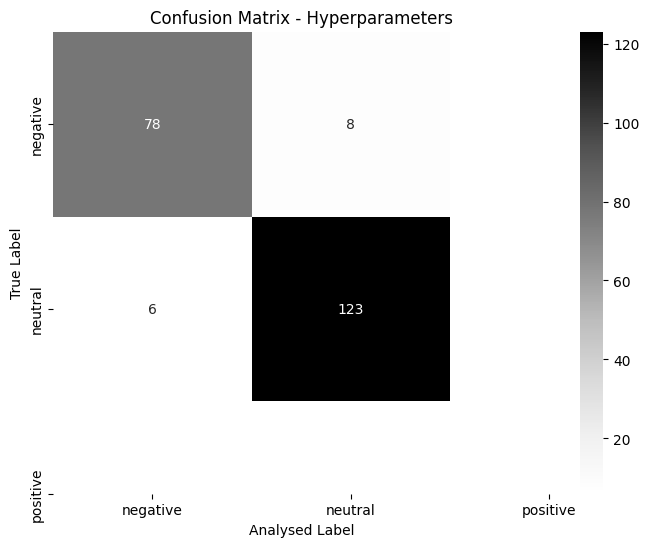

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix_test = confusion_matrix(y_test, y_pred_best_pac_randomized)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Greys', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix - Hyperparameters')
plt.xlabel('Analysed Label')
plt.ylabel('True Label')
plt.show()

#**Pickle File Creation**

In [ ]:
import pickle

sentiment_model = best_pac_classifier_randomized

filename = 'sentiment_model.pkl'
with open(filename, 'wb') as file:
  pickle.dump(sentiment_model, file)

In [ ]:
import pickle
filename = 'sentiment_model.pkl'
with open(filename, 'wb') as file:
  pickle.dump(sentiment_model, file)

In [ ]:
with open(filename, 'rb') as f:
    model = pickle.load(f)

In [ ]:
with open('sentiment_model.pkl', 'rb') as f:
    model = pickle.load(f)

y_pred = model.predict(X_test_tfidf)

In [ ]:
y_pred[3]

0